# MOOC Recherche Reproductible

# Exercice Module 3 - Document computationnel (2020.04)

# **Sujet 2 : le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle**


## Introduction
William Playfair était un des pionniers de la présentation graphique des données. Il est notamment considéré comme l'inventeur de l'histogramme. [Un de ses graphes célèbres](https://upload.wikimedia.org/wikipedia/commons/3/3a/Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat%2C_and_Wages_of_Labour_by_the_Week%2C_from_1565_to_1821.png), tiré de son livre "A Letter on Our Agricultural Distresses, Their Causes and Remedies", montre l'évolution du prix du blé et du salaire moyen entre 1565 et 1821. 


## Objective
1. Reproduire le graphe de Playfair à partir des données numériques.
2. Améliorer la présentation de ces données.
3. Mieux présenter l'information que le pouvoir d'achat des ouvriers avait augmenté au cours du temps.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 0 Récuperation des données
- Des valeurs obtenues par numérisation du graphe sont aujourd'hui téléchargeables, avec la version en format CSV sur [ce site](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv).

1) Déposer le fichier csv en locale si ce fichier local n'existe pas. 


2) Lisez le fichier CSV local.

In [2]:
file_csv = "Wheat.csv" 

import os.path
import requests
if os.path.isfile(file_csv) == False:
    url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"
    
    req = requests.get(url)
    url_content = req.content
    csv_file = open(file_csv, 'wb')
    csv_file.write(url_content)
    csv_file.close()

raw_data = pd.read_csv(file_csv)
raw_data

Unnamed: 0  Year  Wheat  Wages
0            1  1565   41.0   5.00
1            2  1570   45.0   5.05
2            3  1575   42.0   5.08
3            4  1580   49.0   5.12
4            5  1585   41.5   5.15
5            6  1590   47.0   5.25
6            7  1595   64.0   5.54
7            8  1600   27.0   5.61
8            9  1605   33.0   5.69
9           10  1610   32.0   5.78
10          11  1615   33.0   5.94
11          12  1620   35.0   6.01
12          13  1625   33.0   6.12
13          14  1630   45.0   6.22
14          15  1635   33.0   6.30
15          16  1640   39.0   6.37
16          17  1645   53.0   6.45
17          18  1650   42.0   6.50
18          19  1655   40.5   6.60
19          20  1660   46.5   6.75
20          21  1665   32.0   6.80
21          22  1670   37.0   6.90
22          23  1675   43.0   7.00
23          24  1680   35.0   7.30
24          25  1685   27.0   7.60
25          26  1690   40.0   8.00
26          27  1695   50.0   8.50
27          28  1700   30.0   9.00
28          29  1705   32.0  10.00
29          30  1710   44.0  11.00
30          31  1715   33.0  11.75
31          32  1720   29.0  12.50
32          33  1725   39.0  13.00
33          34  1730   26.0  13.30
34          35  1735   32.0  13.60
35          36  1740   27.0  14.00
36          37  1745   27.5  14.50
37          38  1750   31.0  15.00
38          39  1755   35.5  15.70
39          40  1760   31.0  16.50
40          41  1765   43.0  17.60
41          42  1770   47.0  18.50
42          43  1775   44.0  19.50
43          44  1780   46.0  21.00
44          45  1785   42.0  23.00
45          46  1790   47.5  25.50
46          47  1795   76.0  27.50
47          48  1800   79.0  28.50
48          49  1805   81.0  29.50
49          50  1810   99.0  30.00
50          51  1815   78.0    NaN
51          52  1820   54.0    NaN
52          53  1821   54.0    NaN

- Remarque : Il manque l'info des salaires pour les années 1815, 1820, 1821.

    1) Pour instant, garder les lignes pour les années 1815, 1820. On pourrait quand même présenter les données des prix de blé pour ces deux ans même s'ils manquent les données des salaires. 

    2) Supprimer seuelement la ligne de l'année 1821 : les données de cette année est juste une copie de l'année 1820. 

    Donc dans la figure, la largeur de barre pour l'année 1820 est juste 1 an au lieu de 5 ans comme pour le reste. 

In [3]:
data = raw_data.drop([52], axis=0) 

## 1 Graphe de Playfair

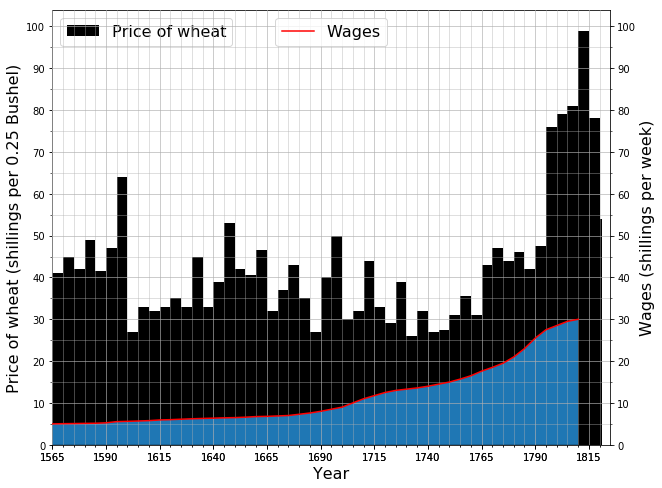

In [4]:
# Parameter for plot settings : width for bars
width = [raw_data["Year"][row+1]-raw_data["Year"][row] for row in range(len(data["Year"]))]

# Plot
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(111)
ax1.bar(data["Year"],data["Wheat"],width=width,align="edge",color="k")
ax1.legend(['Price of wheat'], loc='upper left',fontsize=16)

ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
curve1 = ax2.plot(data['Year'],data['Wages'], 'r-')
ax2.set_ylim(ax1.get_ylim())
ax2.fill_between(data['Year'], 0,data['Wages'])
ax2.legend(['Wages'], loc='upper center',fontsize=16)

#---------------- X axis set-ups
delta_yr = width[0]
yr_min = min(data['Year'])
yr_max = max(data['Year'])+delta_yr
plt.xlim([yr_min,yr_max])
yr_tickes = np.arange(yr_min,yr_max,delta_yr)
ax1.set_xticks(yr_tickes[0::5],minor=False)
ax1.set_xticks(yr_tickes,minor=True)

plt.xlabel("Year",fontsize=16)

#---------------- Bar plot : Y axis set-ups
ytickes = np.arange(0,100+0.01,5)
ax1.set_yticks(ytickes[0::2],minor=False)
ax1.set_yticks(ytickes,minor=True)

ax1.set_ylabel("Price of wheat (shillings per 0.25 Bushel)",fontsize=16)

#---------------- Curve plot : Y axis set-ups
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_yticks(ytickes[0::2],minor=False)
ax2.set_yticks(ytickes,minor=True)

ax2.set_ylabel("Wages (shillings per week)",fontsize=16)

plt.grid(which='both', alpha=0.5)

## 2 Amélioration de la présentation
- Utiliser plutôt les unités modernes pour les deux quantités :

    1) Pour le prix du blé, 1 shillings pour un quart de boisseau de blé = (1/20) £ / 6.8kg = 0.00735 £/kg 
    
    2) Pour les salaires, 1 shilling par semaine = (1/20)£ /semaine = 0.05 £ / semaine
    

- Transfomer les données et les sauvegarder dans un nouveau dataframe

In [5]:
transf_data = data
transf_data['Wheat'] = transf_data['Wheat'] * 0.00735
transf_data['Wages'] = transf_data['Wages'] * 0.05

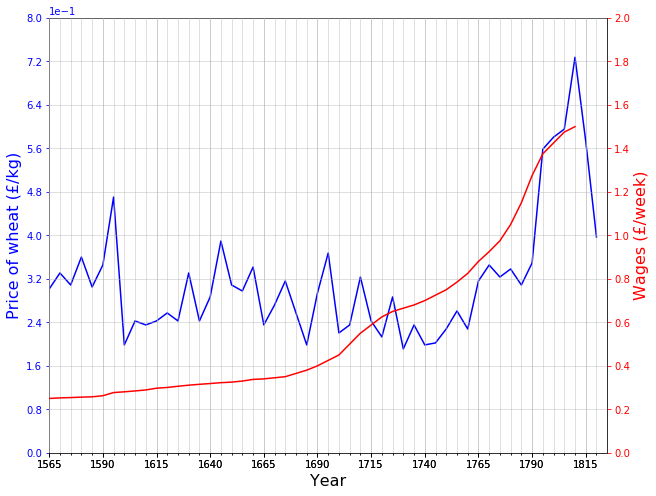

In [6]:
import math

# Plot
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(111)
ax1.plot(transf_data["Year"],transf_data["Wheat"],'b-')

ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
curve1 = ax2.plot(transf_data['Year'],transf_data['Wages'], 'r-')

#---------------- X axis set-ups
plt.xlim([yr_min,yr_max])
ax1.set_xticks(yr_tickes[0::5],minor=False)
ax1.set_xticks(yr_tickes,minor=True)
plt.xlabel("Year",fontsize=16)

#---------------- Curve plot 1: Y axis set-ups
ax1.tick_params(axis='y', colors='b')

def round_up(n, decimals=0): 
    multiplier = 10 ** decimals 
    return math.ceil(n * multiplier) / multiplier

ylim_min = 0
_, ylim_max1= ax1.set_ylim([ylim_min,ax1.get_ylim()[1]])
ytickes_num = 11
ytickes_ax1 = np.linspace(ylim_min,round_up(ylim_max1,1),num=ytickes_num)
ax1.set_yticks(ytickes_ax1,minor=False)
ax1.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
ax1.set_ylabel("Price of wheat (£/kg)",fontsize=16)
ax1.yaxis.label.set_color('b')

#---------------- Curve plot 2: Y axis set-ups
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.tick_params(axis='y', colors='r')

_, ylim_max2 = ax2.set_ylim([ylim_min,ax2.get_ylim()[1]])
ytickes_ax2 = np.linspace(ylim_min,round_up(ylim_max2,0),num=ytickes_num)
ax2.set_yticks(ytickes_ax2,minor=False)
ax2.set_ylabel("Wages (£/week)",fontsize=16)
ax2.yaxis.label.set_color('r')

plt.grid(which='both', alpha=0.5)

## 3 Répresentation du pouvoir d'achat


### 3.1 Mission 1

- Définir comme la quantité de blé qu'un ouvrier peut acheter avec son salaire hebdomadaire.

   Sauvegarder cette quantité *PurchasingPower* dans le dataframe *transf_data* et supprimer les années où il manque des infos sur les salaires.

In [7]:
transf_data['PurchasingPower'] = transf_data['Wages'] / transf_data['Wheat']
transf_data = transf_data.dropna().copy()

- Faire une représentation graphique du pouvoir d'achat au cours du temps.

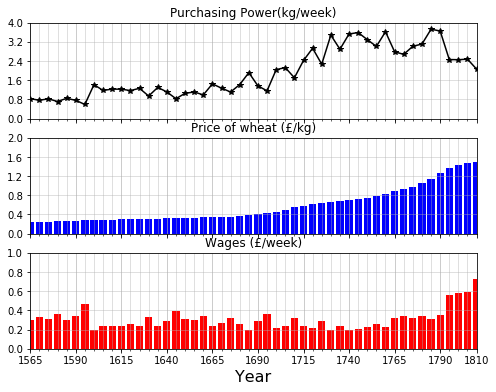

In [8]:
# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(8,6))

ax1.plot(transf_data["Year"],transf_data["PurchasingPower"],'k-',marker='*')         
ax2.bar(transf_data["Year"],transf_data["Wages"],width=delta_yr*0.8,align="center",color="b")  
ax3.bar(transf_data["Year"],transf_data["Wheat"],width=delta_yr*0.8,align="center",color="r")

#---------------- X axis set-ups
yr_min = min(transf_data['Year'])
yr_max = max(transf_data['Year'])
plt.xlim([yr_min,yr_max])
yr_tickes = np.arange(yr_min,yr_max,delta_yr)
yr_tickes_major = np.append(yr_tickes[0::5],yr_max)
ax3.set_xticks(yr_tickes_major,minor=False)
ax3.set_xticks(yr_tickes,minor=True)
ax3.set_xlabel("Year",fontsize=16)

#---------------- Y axis set-ups 
ytick_num = 6

ylim_1 = math.ceil(np.max(ax1.get_ylim()))
ytickes_ax1 = np.linspace(0,ylim_1,num=ytick_num)
ax1.set_yticks(ytickes_ax1,minor=False)

ylim_2 = math.ceil(np.max(ax2.get_ylim()))
ytickes_ax2 = np.linspace(0,ylim_2,num=ytick_num)
ax2.set_yticks(ytickes_ax2,minor=False)

ylim_3 = math.ceil(np.max(ax3.get_ylim()))
ytickes_ax3 = np.linspace(0,ylim_3,num=ytick_num)
ax3.set_yticks(ytickes_ax3,minor=False)

#---------------- Grid set-ups 
ax1.grid(which='both', alpha=0.5)
ax2.grid(which='both', alpha=0.5)
ax3.grid(which='both', alpha=0.5)

ax1.title.set_text("Purchasing Power(kg/week)")
ax2.title.set_text("Price of wheat (£/kg)")
ax3.title.set_text("Wages (£/week)")

- Remarques

    1) Il y a évidemment une grande augmentation du pouvoir d'achat au travers du 17ème siècle, qui montre d'environ **1.0 kg** du blé par les salaires hebdomentaires à plus de **3.0 kg**. 

    2) La chute du pouvoir d'achat à la fin du 18ème siècle est principalement du à l'augmentation du prix du blé à ce monment-là. 

### 3.2 Mission 2

- Montrez les deux quantités (prix du blé, salaire) sur deux axes différents, sans l'axe du temps. 


- Trouvez une autre façon d'indiquer la progression du temps dans ce graphique.

    **Proposition** : La progression du temps est présentée par la couleur des points, dans la figure ci-dessous. 

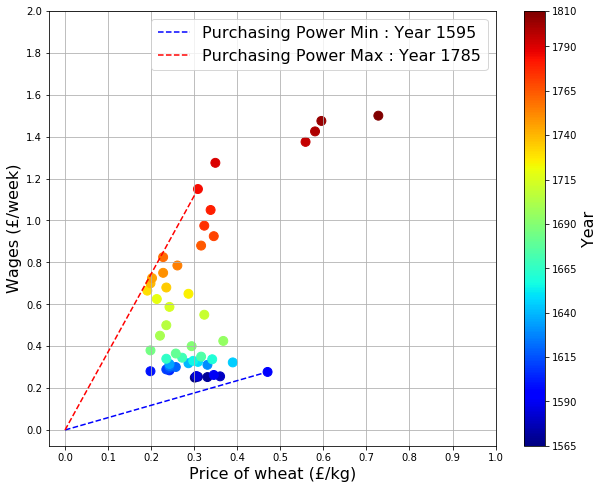

In [9]:
# Plot
fig= plt.figure(figsize = (10,8))
ax = plt.gca()
sc = plt.scatter(transf_data["Wheat"],transf_data["Wages"],s=80,c=transf_data["Year"],cmap=plt.cm.jet,label=None)

idx_PurPower_min = transf_data[["PurchasingPower"]].idxmin()
idx_PurPower_max = transf_data[["PurchasingPower"]].idxmax()
line1_lgd = "Purchasing Power Min : Year "+transf_data["Year"][idx_PurPower_min].to_string(index=False)
line2_lgd = "Purchasing Power Max : Year "+transf_data["Year"][idx_PurPower_max].to_string(index=False)

line1 = plt.plot([0,transf_data["Wheat"][idx_PurPower_min]],[0,transf_data["Wages"][idx_PurPower_min]],'b--',label=line1_lgd)
line2 = plt.plot([0,transf_data["Wheat"][idx_PurPower_max]],[0,transf_data["Wages"][idx_PurPower_max]],'r--',label=line2_lgd)
plt.legend(fontsize=16)
#---------------- X axis set-ups 
tick_num = 11
xlim = math.ceil(np.max(ax.get_xlim()))
xtickes = np.linspace(0,xlim,num=tick_num)
ax.set_xticks(xtickes,minor=False)

plt.xlabel("Price of wheat (£/kg)",fontsize=16)

#---------------- Y axis set-ups 
ylim = math.ceil(np.max(ax.get_ylim()))
ytickes = np.linspace(0,ylim,num=tick_num)
ax.set_yticks(ytickes,minor=False)

plt.ylabel("Wages (£/week)",fontsize=16)

#---------------- Colorbar set-ups
cbar = plt.colorbar(sc)
cbar.set_ticks(yr_tickes_major)
cbar.set_label("Year",fontsize=16)


plt.grid()

- Remarques

    1) La progression du temps est présentée par la couleur des *points*, de la couleur bleu à la rouge.

    2) Dans ce plot, **le pouvoir d'achat** est présenté comme **la pente de la ligne** qui lie l'origine et les *points*. On note bien que le pouvoir d'achat des ouvriers avait principalement augmenté au cours du temps, qui avait atteint un pic à l'année 1785.

    3) Une désavantage de ce plot : on pourrait pas bien savoir l'année exacte que chaque *point* présente. Mais au moins, la progression du temps est clairement présenté par la dégradation de couleur.